In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./train.csv")
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


<BarContainer object of 2 artists>

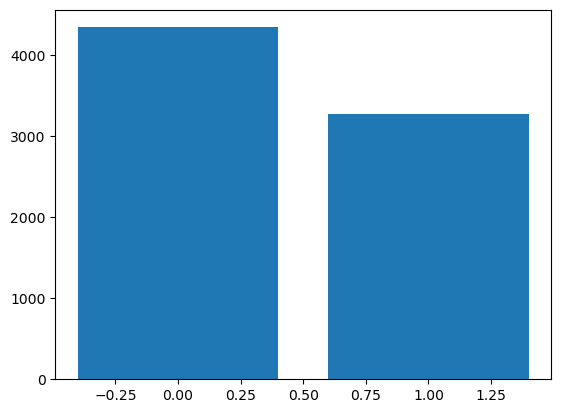

In [3]:
import matplotlib.pyplot as plt

# First, let's calculate the number of instances for each class
instances_count = df['target'].value_counts()

# Plotting the graph
plt.bar(instances_count.index, instances_count.values)

In [4]:
df['keyword'].isna().sum()

61

In [5]:
df['location'].isna().sum()

2533

In [6]:
for i in range(10):
    print(df['text'])

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object
0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ..

In [7]:
import nltk
from nltk.corpus import stopwords

#nltk.download('stopwords')


In [8]:
stop_words = set(stopwords.words('english'))  # Postavite jezik na engleski

# Funkcija za uklanjanje stop riječi iz teksta
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Primjena funkcije na stupac 'text' u DataFrame-u
df['text'] = df['text'].apply(remove_stopwords)


In [9]:
for i in range(10):
    print(df['text'][i])

Deeds Reason #earthquake May ALLAH Forgive us
Forest fire near La Ronge Sask. Canada
residents asked 'shelter place' notified officers. evacuation shelter place orders expected
13,000 people receive #wildfires evacuation orders California
got sent photo Ruby #Alaska smoke #wildfires pours school
#RockyFire Update => California Hwy. 20 closed directions due Lake County fire - #CAfire #wildfires
#flood #disaster Heavy rain causes flash flooding streets Manitou, Colorado Springs areas
I'm top hill see fire woods...
There's emergency evacuation happening building across street
I'm afraid tornado coming area...


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#X = df.drop(['target', 'id'], axis = 1)
Y = df['target']
X = df['text']

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
def encode(X):
    encoder = OrdinalEncoder()
    X['keyword'] = encoder.fit_transform(X[['keyword']])
    X['location'] = encoder.fit_transform(X[['location']])


In [14]:
#encode(X)

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import numpy as np

# Pretvorite tekst u listu tokena
tokenized_text = X.apply(simple_preprocess)

# Trenirajte Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Funkcija za generiranje vektora za rečenicu
def sentence_vector(sentence):
    vectors = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

# Generiranje vektora za sve rečenice
X_text_word2vec = np.array([sentence_vector(sentence) for sentence in tokenized_text])

# Zamijenite 'text' kolonu s vektorima značajki
X = list(X_text_word2vec)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Pretvorite tekstualne podatke u vektore značajki koristeći TF-IDF
def vec(X):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(X)
    return X

In [16]:
X = vec(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

In [18]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
def train(X, y):
    clf = MultinomialNB()
    clf.fit(X, y)
    return clf

In [21]:
from sklearn.metrics import f1_score, accuracy_score

In [22]:
def test(y_true, y_pred):
    print(f1_score(y_true, y_pred), accuracy_score(y_true, y_pred))

In [23]:
model = train(X_train, y_train)
test(y_test, model.predict(X_test))

0.7251063829787234 0.7879185817465528


In [26]:
model1 = train(X, Y)

In [28]:
test_set = pd.read_csv("./test.csv")
id1 = test_set['id']
test_set = test_set['text']
test_set = vec(test_set)
test_set

<3263x12279 sparse matrix of type '<class 'numpy.float64'>'
	with 48133 stored elements in Compressed Sparse Row format>